## Statistical Analysis of LIVE/DEAD Essay

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import Graphics

In [4]:
# Set colors
palette = Graphics.palette()
bars_palette = sns.color_palette('crest')

## Define base colors for cool sage, soft gold, and coral rose
cool_sage = "#9CAF88"
soft_gold = "#D4AF37"
coral_rose = "#E76F51"
## Create an expanded palette using Seaborn's blend_palette for smooth gradients
markers_palette = sns.color_palette(sns.blend_palette([cool_sage, soft_gold, coral_rose], n_colors=9))

### Load Annotation CSV

Using Fiji, 19 images from Live/Dead essays were analysed by counting the number of cells Hoechst+, CalceinAM+, PI+ and CalceinAM+PI+.

The CalceinAM+ and PI+ cells include all the cells expressing this markers, independent of the other. Therefore, in addition to these analysis, CalceinAM+PI+ cells were also counted. These represent a very small portion of all the cells. Nevertheless, its ration its not null. 

The most promissing analysis is that these CalceinAM+PI+ cells are were a transition state on the time they were stained. The staining and imaging always introduces some stress on the living cells and these might be associated to that response.

In [5]:
# .csv Path with Fiji annotations
annotation_path = "/Users/Beatriz/Documents/Biomédica@IST/Mestrado/Tese/datasets_segmentation/E2WT24H__Hoechst_CalceinAM_PI/counting_lifedead/summary_lifedead.csv"

# Path of the images used for annotation
images_path = "/Users/Beatriz/Documents/Biomédica@IST/Mestrado/Tese/datadatasets_segmentationsets/E2WT24H__Hoechst_CalceinAM_PI/counting_lifedead"

# Import .csv file with Live/Dead annotations
df_annotations = pd.read_csv(annotation_path, delimiter=";") 
df = df_annotations.drop_duplicates()

# Show the dataframe
df

,File Name,Hoechst,CalceinAM+,PI+,CalceinAM+PI+
0,E2 WT 24H N1 5mM P1,283,222,55,1
1,E2 WT 24H N1 Fibrin P2,85,40,18,1
2,E2 WT 24H N1 PDL R1 Merged,266,223,0,0
3,E2 WT 24H N2 50mM P2,94,56,13,4
4,E2 WT 24H N2 100mM P1,88,43,20,2
5,E2 WT 24H N2 175mM P2,63,32,19,1
6,E2 WT 24H N2 PDL R1 Merged,142,91,0,0
7,E2 WT 24H N3 5mM P1,147,103,25,1
8,E2 WT 24H N3 50mM P1,77,72,8,3
9,E2 WT 24H N3 100mM P1,67,61,8,2


### Metrics creation

The annotation using Fiji does not show the total view of the viability essay paradigm. 

In this section, additional metrics are computed as well as the dataset images specificities (#Replicate, Culture ID)

In [6]:
# Rename dtaframe columns to more comprehensive names
df = df.rename(columns={"Hoechst":"Hoechst+", 
                        "CalceinAM+":"CalceinAM+Hoechst+",
                        "PI+":"PI+Hoechst+",
                        "CalceinAM+PI+":"CalceinAM+PI+Hoechst+"})
df

,File Name,Hoechst+,CalceinAM+Hoechst+,PI+Hoechst+,CalceinAM+PI+Hoechst+
0,E2 WT 24H N1 5mM P1,283,222,55,1
1,E2 WT 24H N1 Fibrin P2,85,40,18,1
2,E2 WT 24H N1 PDL R1 Merged,266,223,0,0
3,E2 WT 24H N2 50mM P2,94,56,13,4
4,E2 WT 24H N2 100mM P1,88,43,20,2
5,E2 WT 24H N2 175mM P2,63,32,19,1
6,E2 WT 24H N2 PDL R1 Merged,142,91,0,0
7,E2 WT 24H N3 5mM P1,147,103,25,1
8,E2 WT 24H N3 50mM P1,77,72,8,3
9,E2 WT 24H N3 100mM P1,67,61,8,2


In [7]:
# Compute additional metrics

## Number of cells expressing just CalceinAM or PI
df["CalceinAM+PI-Hoechst+"] = df["CalceinAM+Hoechst+"]-df["CalceinAM+PI+Hoechst+"]  # Experimentally Live Cells
df["CalceinAM-PI+Hoechst+"] = df["PI+Hoechst+"]-df["CalceinAM+PI+Hoechst+"]         # Experimentally Dead Cells

## Number of cells expressing neither CalceinAM or PI, but Hoechst signal == Experimentally Unclassified Cells
df["CalceinAM-PI-Hoechst+"] = df["Hoechst+"] - (df["CalceinAM+Hoechst+"]-df["CalceinAM+PI+Hoechst+"]) - (df["PI+Hoechst+"]-df["CalceinAM+PI+Hoechst+"]) - df["CalceinAM+PI+Hoechst+"]

## Number of cells that do not express PI (dead) marker, and might or might not express CalceinAM (living) marker == Computed Live Cells
df["PI-Hoechst+"] = df["CalceinAM+PI-Hoechst+"] + df["CalceinAM-PI-Hoechst+"]

In [8]:
# Images ID
df["Experiment"] = [name.split(" ")[0] for name in df["File Name"]]
df["Replicate"] = [name.split(" ")[3] for name in df["File Name"]]
df["Culture ID"] = [name.split(" ")[4] for name in df["File Name"]]

In [9]:
# Show dataframe grouped by Culture ID and columns showing: #Computed Live Cells, #Experimentally Dead Cells, #Experimentally Biased Cells
df.groupby(by="Culture ID", group_keys=True)[["PI-Hoechst+", "CalceinAM-PI+Hoechst+", "CalceinAM+PI+Hoechst+"]].apply(lambda x: x)

PI-Hoechst+  CalceinAM-PI+Hoechst+  CalceinAM+PI+Hoechst+
Culture ID                                                              
100mM      4            68                     18                      2
           9            59                      6                      2
           15           16                      3                      0
175mM      5            44                     18                      1
           10           38                      6                      0
           16           23                      3                      1
50mM       3            81                      9                      4
           8            69                      5                      3
           14           15                      5                      1
5mM        0           228                     54                      1
           7           122                     24                      1
           13           37                      8                      4
Fibrin     1            67                     17                      1
           11           70                      5                      1
           17           23                      1                      1
PDL        2           266                      0                      0
           6           142                      0                      0
           12           87                      0                      0
           18           52                      0                      0

## Analysis

In [10]:
df[['PI-Hoechst+', 'CalceinAM+PI+Hoechst+', 'CalceinAM-PI+Hoechst+']]

,PI-Hoechst+,CalceinAM+PI+Hoechst+,CalceinAM-PI+Hoechst+
0,228,1,54
1,67,1,17
2,266,0,0
3,81,4,9
4,68,2,18
5,44,1,18
6,142,0,0
7,122,1,24
8,69,3,5
9,59,2,6


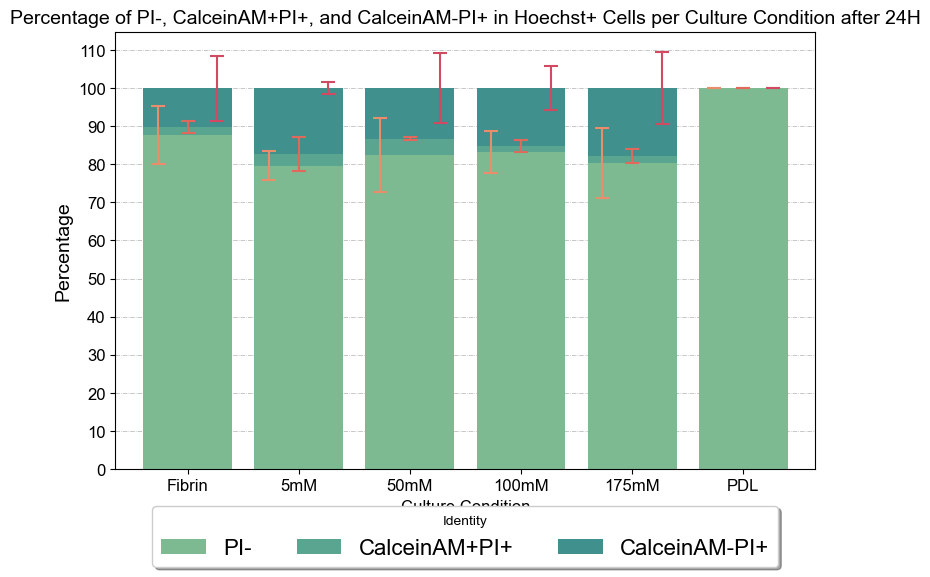

In [28]:
# Plot of the percentages of Computed Live Cells, Experimentally Dead Cells and Experimentally Biased Cells

## Metrics of interest
metrics = ["PI-Hoechst+", "CalceinAM-PI+Hoechst+", "CalceinAM+PI+Hoechst+"]

## Total number of observations
num_observations = df[metrics].sum(axis=1)

## Order the Gel conditions of interest
order_conditions = ["Fibrin", "5mM", "50mM", "100mM", "175mM", "PDL"]

## Calculate the percentages of each condition
df['PI-Hoechst+ %'] = df['PI-Hoechst+'] / num_observations * 100                         # % Computed Live Cells
df['CalceinAM-PI+Hoechst+ %'] = df['CalceinAM-PI+Hoechst+'] / num_observations * 100     # % Experimentally Dead Cells 
df['CalceinAM+PI+Hoechst+ %'] = (df['CalceinAM+PI+Hoechst+']) / num_observations * 100   # % Experimentally Biased Cells

df_percentages_std = df.groupby('Culture ID', sort=True)[['PI-Hoechst+ %', 'CalceinAM+PI+Hoechst+ %', 'CalceinAM-PI+Hoechst+ %']].std()
df_new_percentages_std = df_percentages_std.reset_index()

## Group by 'Culture ID' and calculate the mean percentage for each stain
df_percentages_mean = df.groupby('Culture ID', sort=True)[['PI-Hoechst+ %', 'CalceinAM+PI+Hoechst+ %', 'CalceinAM-PI+Hoechst+ %']].mean()
df_new_percentages_mean = df_percentages_mean.reset_index()

# Plotting
# ax1 = df_percentages_mean.loc[order_conditions].plot(kind='bar', stacked=True, figsize=(8, 6), color=bars_palette, zorder=2, width = 0.8)

# ax1 = df_percentages_mean.loc[order_conditions].plot(
#     kind='bar', 
#     stacked=True, 
#     figsize=(8, 6), 
#     color=bars_palette, 
#     zorder=2, 
#     width=0.8, 
#     yerr=df_percentages_std.loc[order_conditions],  # Add error bars using the std deviation
#     capsize=5  # Optional: Adjust the size of the caps on the error bars
# )

ax1 = df_percentages_mean.loc[order_conditions].plot(
    kind='bar', 
    stacked=True, 
    figsize=(8, 6), 
    color=bars_palette, 
    zorder=2, 
    width=0.8  # Adjust width as needed
)

# Get the bar positions
bar_positions = np.array([p for p in ax1.get_xticks()])
bar_width = 0.8 / len(df_percentages_mean.columns)  # Adjust width for spacing

errbar = sns.color_palette("flare")


# Manually plot error bars
for i, col in enumerate(df_percentages_mean.columns):  # Iterate through each bar group
    ax1.errorbar(
        bar_positions + (i - len(df_percentages_mean.columns) / 3) * bar_width,  # Adjust x positions
        df_percentages_mean.cumsum(axis=1).loc[order_conditions, col],  # Y values (heights of bars)
        yerr=df_percentages_std.loc[order_conditions, col],  # Standard deviation for error bars
        fmt='none',  # No marker, just error bars
        ecolor=errbar[i],  # Set error bar color to match bars
        elinewidth=1.5,  # Adjust line width
        capsize=5,  # Add caps to error bars
        capthick=1.5  # Adjust cap thickness
    )

#  = ax1.twinx()
ax2 = plt.grid(visible=True, which='both', axis='y', linestyle='-.', linewidth=0.5, zorder=0)

ax1.set_xlabel('Culture Condition')
ax1.set_xticks(ticks=np.arange(len(order_conditions)), labels=order_conditions, rotation='horizontal', fontsize=12)
ax1.set_ylabel('Percentage', fontsize=14)
y_ticks = np.arange(0,120,10)
ax1.set_yticks(ticks=y_ticks,labels=list(y_ticks), fontsize=12)
plt.title('Percentage of PI-, CalceinAM+PI+, and CalceinAM-PI+ in Hoechst+ Cells per Culture Condition after 24H', fontsize=14)
ax1.legend(title='Identity', loc='lower center', bbox_to_anchor=(0.5, -0.25),
           fancybox=True, shadow=True, ncol=4, labels=["PI-", "CalceinAM+PI+", "CalceinAM-PI+"], fontsize=16)
plt.tight_layout()
plt.savefig('Images/E2_livedead.pdf', transparent=True, bbox_inches = 'tight')
plt.show()

In [33]:
df_percentages_mean.cumsum(axis=1)

,PI-Hoechst+ %,CalceinAM+PI+Hoechst+ %,CalceinAM-PI+Hoechst+ %
Culture ID,,,
100mM,83.180985,84.933586,100.0
175mM,80.463364,82.227032,100.0
50mM,82.403058,86.707501,100.0
5mM,79.689591,82.755222,100.0
Fibrin,87.642931,89.807018,100.0
PDL,100.000000,100.000000,100.0


In [12]:
df_percentages = df[['PI-Hoechst+ %', 'CalceinAM+PI+Hoechst+ %', 'CalceinAM-PI+Hoechst+ %', 'Culture ID']]
df_percentages.groupby('Culture ID', sort=True).apply(lambda x: x)

/var/folders/ml/978gv1hs5yv185y4wyk_hfgw0000gn/T/ipykernel_22040/3274542321.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_percentages.groupby('Culture ID', sort=True).apply(lambda x: x)


PI-Hoechst+ %  CalceinAM+PI+Hoechst+ %  \
Culture ID                                              
100mM      4       77.272727                 2.272727   
           9       88.059701                 2.985075   
           15      84.210526                 0.000000   
175mM      5       69.841270                 1.587302   
           10      86.363636                 0.000000   
           16      85.185185                 3.703704   
50mM       3       86.170213                 4.255319   
           8       89.610390                 3.896104   
           14      71.428571                 4.761905   
5mM        0       80.565371                 0.353357   
           7       82.993197                 0.680272   
           13      75.510204                 8.163265   
Fibrin     1       78.823529                 1.176471   
           11      92.105263                 1.315789   
           17      92.000000                 4.000000   
PDL        2      100.000000                 0.000000   
           6      100.000000                 0.000000   
           12     100.000000                 0.000000   
           18     100.000000                 0.000000   

               CalceinAM-PI+Hoechst+ % Culture ID  
Culture ID                                         
100mM      4                 20.454545      100mM  
           9                  8.955224      100mM  
           15                15.789474      100mM  
175mM      5                 28.571429      175mM  
           10                13.636364      175mM  
           16                11.111111      175mM  
50mM       3                  9.574468       50mM  
           8                  6.493506       50mM  
           14                23.809524       50mM  
5mM        0                 19.081272        5mM  
           7                 16.326531        5mM  
           13                16.326531        5mM  
Fibrin     1                 20.000000     Fibrin  
           11                 6.578947     Fibrin  
           17                 4.000000     Fibrin  
PDL        2                  0.000000        PDL  
           6                  0.000000        PDL  
           12                 0.000000        PDL  
           18                 0.000000        PDL

### Statistical Analysis

In [12]:
df_percentages.groupby("Culture ID").mean()

,PI-Hoechst+ %,CalceinAM+PI+Hoechst+ %,CalceinAM-PI+Hoechst+ %
Culture ID,,,
100mM,83.180985,1.752601,15.066414
175mM,80.463364,1.763668,17.772968
50mM,82.403058,4.304443,13.292499
5mM,79.689591,3.065631,17.244778
Fibrin,87.642931,2.164087,10.192982
PDL,100.000000,0.000000,0.000000


In [13]:
df_percentages.groupby("Culture ID").std()

,PI-Hoechst+ %,CalceinAM+PI+Hoechst+ %,CalceinAM-PI+Hoechst+ %
Culture ID,,,
100mM,5.466687,1.559027,5.783659
175mM,9.217855,1.858140,9.436593
50mM,9.658583,0.434986,9.237366
5mM,3.817596,4.417705,1.590451
Fibrin,7.638007,1.591473,8.590456
PDL,0.000000,0.000000,0.000000


In [14]:
df_percentages.groupby("Culture ID").median()

,PI-Hoechst+ %,CalceinAM+PI+Hoechst+ %,CalceinAM-PI+Hoechst+ %
Culture ID,,,
100mM,84.210526,2.272727,15.789474
175mM,85.185185,1.587302,13.636364
50mM,86.170213,4.255319,9.574468
5mM,80.565371,0.680272,16.326531
Fibrin,92.000000,1.315789,6.578947
PDL,100.000000,0.000000,0.000000


In [48]:
np.std([84.210526, 85.185185, 86.170213, 80.565371])

2.118441403464749

#### T1: Differnece in survival in Fibrin and FibrinVLVG hydrogels

In [17]:
from scipy.stats import ttest_ind

a = df_percentages[df_percentages['Culture ID'] == 'Fibrin']["PI-Hoechst+ %"]

b = df_percentages[(df_percentages['Culture ID'] != 'Fibrin') & (df_percentages['Culture ID'] != 'PDL')]["PI-Hoechst+ %"]


ttest_ind(a, b)

TtestResult(statistic=1.4325628973658318, pvalue=0.17558896583749872, df=13.0)

#### T2: Difference in survival in PDL and Hydrpogels

In [18]:
a = df_percentages[df_percentages['Culture ID'] == 'PDL']["PI-Hoechst+ %"]

b = df_percentages[(df_percentages['Culture ID'] != 'PDL')]["PI-Hoechst+ %"]


ttest_ind(a, b)

/Users/Beatriz/anaconda3/envs/astroneudl/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:573: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


TtestResult(statistic=4.872815884836801, pvalue=0.00014310644237143746, df=17.0)

#### T3: Correlation Ca2+ with viability

In [15]:
from scipy.stats import pearsonr, spearmanr

# Correlation between Ca2+ concentration on FibrinVLVG gels and cell death
## Filter FibrinVLVG gels
fibrinVLVG_gels = ["5mM", "50mM", "100mM", "175mM"]
# fibrinVLVG_gels = ["Fibrin", "5mM", "50mM", "100mM", "175mM"]

df_FibrinVLVG = df_percentages[df['Culture ID'].isin(fibrinVLVG_gels)]

df_FibrinVLVG["Magnitude"] = [fibrinVLVG_gels.index(m) for m in df_FibrinVLVG['Culture ID']]
df_FibrinVLVG["Concentration"] = [int(c[:-2]) for c in df_FibrinVLVG['Culture ID']]

## Calculate pearson correlation
pearson_living = pearsonr(x=df_FibrinVLVG["Concentration"], y=df_FibrinVLVG["PI-Hoechst+ %"])
pearson_dead = pearsonr(x=df_FibrinVLVG["Concentration"], y=df_FibrinVLVG["CalceinAM-PI+Hoechst+ %"])

## Calculate spearman correlation
spearman_living = spearmanr(b=df_FibrinVLVG["Magnitude"], a=df_FibrinVLVG["PI-Hoechst+ %"])
spearman_dead = spearmanr(b=df_FibrinVLVG["Magnitude"], a=df_FibrinVLVG["CalceinAM-PI+Hoechst+ %"])

## Correlation dataframe
pd.DataFrame(data=np.array([pearson_living,pearson_dead,spearman_living,spearman_dead]), 
             columns=["correlation","p-vlaue"], 
             index=["Pearson Living", "Pearson Dead", "Spearman Living", "Spearman Dead"])

/var/folders/ml/978gv1hs5yv185y4wyk_hfgw0000gn/T/ipykernel_4583/3384508335.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_FibrinVLVG["Magnitude"] = [fibrinVLVG_gels.index(m) for m in df_FibrinVLVG['Culture ID']]
/var/folders/ml/978gv1hs5yv185y4wyk_hfgw0000gn/T/ipykernel_4583/3384508335.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_FibrinVLVG["Concentration"] = [int(c[:-2]) for c in df_FibrinVLVG['Culture ID']]


,correlation,p-vlaue
Pearson Living,0.028183,0.930717
Pearson Dead,0.089157,0.782899
Spearman Living,0.151142,0.639148
Spearman Dead,-0.064889,0.841206


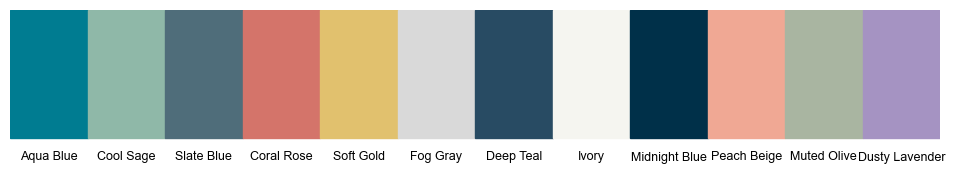

In [16]:
Graphics.view_palette(palette)